In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import artist
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Chargement des données

In [2]:
data = pd.read_csv('data.csv')
data = data.drop(columns = 'hotel_id')
data = data.drop(columns = 'avatar_name')
data_r = pd.get_dummies(data, columns = ['group', 'city', 'brand', 'language']) #on catégorise les variables qualitatives par le one-hot encoder.
data_r.head()

,parking,pool,children_policy,price,stock,date,mobile,group_Accar Hotels,group_Boss Western,group_Chillton Worldwide,...,language_italian,language_lithuanian,language_luxembourgish,language_maltese,language_polish,language_portuguese,language_romanian,language_slovakian,language_spanish,language_swedish
0,1,1,0,366,14,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,359,10,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,193,10,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,205,4,10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,86,0,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Séparation du jeu de données en jeu d'apprentissage et de test
price = data_r["price"]
price = np.log(price)
X_train, X_test, price_train, price_test = train_test_split(data_r,price,test_size=0.25,random_state=11)
X_train = X_train.drop(['price'],axis=1)
X_test = X_test.drop(['price'],axis=1)
X_train.shape, price_train.shape

((227049, 62), (227049,))

#### On définit le MAPE

In [4]:
# On définit la fonction MAPE : Mean Absolute Percentage Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

# Random Forest

In [5]:
rf= RandomForestRegressor(n_estimators=400,max_features=2)
rfFit=rf.fit(X_train, price_train)

In [6]:
# Optimisation des paramètres : Fait planter mon ordinateur 
# param=[{"n_estimators":list(range(50,500,50)),"max_features":list(range(2,10,1)) }]
# n_features = np.shape(X_train)[1]
# rf= GridSearchCV(RandomForestRegressor(),
#         param,cv=10,n_jobs=-1)
# rfOpt=rf.fit(X_train, price_train)

# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

#### Prédictions

In [6]:
predictions = rf.predict(X_test)

In [7]:
print("MSE=",mean_squared_error(price_test,predictions))
print("R2=",r2_score(price_test,predictions))
print("MAPE=", MAPE(price_test,predictions))

MSE= 0.012601410946962443
R2= 0.9463645145754653
MAPE= 1.3725672229587882


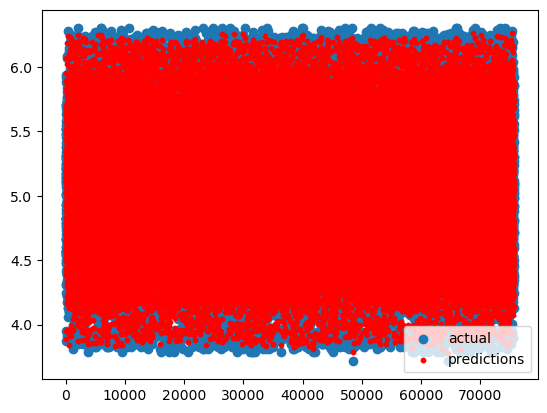

In [8]:
x = np.linspace(1,np.shape(price_test)[0],np.shape(price_test)[0])
plt.scatter(x,price_test,label='actual')
plt.scatter(x,predictions,s=10,c='red',label='predictions')
plt.legend()

In [9]:
test=pd.read_csv("test_set.csv",sep=",",header=0)
#test.index=test['hotel_id']
#test=test.drop(['hotel_id'],axis=1)
test=test.drop(['order_requests'],axis=1)
bis=test

test=test.drop(['index'],axis=1)
test.head()

,city,date,language,mobile,avatar_id,hotel_id,stock
0,vilnius,21,romanian,0,1,161,46
1,vilnius,21,romanian,0,1,187,32
2,vilnius,21,romanian,0,1,279,12
3,vilnius,21,romanian,0,1,395,10
4,vilnius,21,romanian,0,1,488,42


In [36]:
features=pd.read_csv("features_hotels.csv",sep=",",header=0)
features_test=features.loc[features["hotel_id"].loc[test['hotel_id']]]
features_test=features_test.reset_index()

In [37]:
features.head()

,hotel_id,group,brand,city,parking,pool,children_policy
0,0,Yin Yang,Royal Lotus,paris,1,0,1
1,1,Independant,Independant,copenhagen,1,0,0
2,2,Independant,Independant,madrid,0,0,0
3,3,Independant,Independant,rome,1,0,0
4,4,Independant,Independant,sofia,1,0,0


In [38]:
df=pd.concat([features_test,test[['stock','date','language',"mobile"]]],axis=1)
df.index=df['hotel_id']
df=df.drop(['hotel_id'],axis=1)
df=df.drop(['index'],axis=1)
df.head()

,group,brand,city,parking,pool,children_policy,stock,date,language,mobile
hotel_id,,,,,,,,,,
161,Boss Western,J.Halliday Inn,vilnius,1,0,0,46,21,romanian,0
187,Accar Hotels,Marcure,vilnius,1,1,0,32,21,romanian,0
279,Independant,Independant,vilnius,1,0,0,12,21,romanian,0
395,Accar Hotels,Ibas,vilnius,0,0,0,10,21,romanian,0
488,Accar Hotels,Safitel,vilnius,1,1,1,42,21,romanian,0


In [39]:
df = pd.get_dummies(df, columns = ['group', 'city', 'brand', 'language']) #on catégorise les variables qualitatives par le one-hot encoder.
df.head()

,parking,pool,children_policy,stock,date,mobile,group_Accar Hotels,group_Boss Western,group_Chillton Worldwide,group_Independant,...,language_lithuanian,language_luxembourgish,language_maltese,language_polish,language_portuguese,language_romanian,language_slovakian,language_slovene,language_spanish,language_swedish
hotel_id,,,,,,,,,,,,,,,,,,,,,
161,1,0,0,46,21,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
187,1,1,0,32,21,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
279,1,0,0,12,21,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
395,0,0,0,10,21,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
488,1,1,1,42,21,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
df=df.drop(['language_latvian','language_slovene'],axis=1)

In [46]:
predictions = rf.predict(df)

In [47]:
submission=pd.DataFrame()
submission['index']=bis['index']
submission['price']=predictions
submission=submission.reset_index()
submission=submission.drop(['level_0'],axis=1)

In [48]:
submission.head()

,index,price
0,0,4.796587
1,1,5.165506
2,2,4.393177
3,3,4.243592
4,4,5.400021


In [49]:
submission.to_csv('submission.csv', index = False)

## Interpretability

### Features Importance

In [10]:
# Importance décroissante des variables
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : rfFit.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,stock,0.097240
28,brand_Independant,0.083706
9,group_Independant,0.079011
35,brand_Safitel,0.072905
1,pool,0.072411
...,...,...
49,language_greek,0.000266
51,language_irish,0.000264
55,language_maltese,0.000261
56,language_polish,0.000254


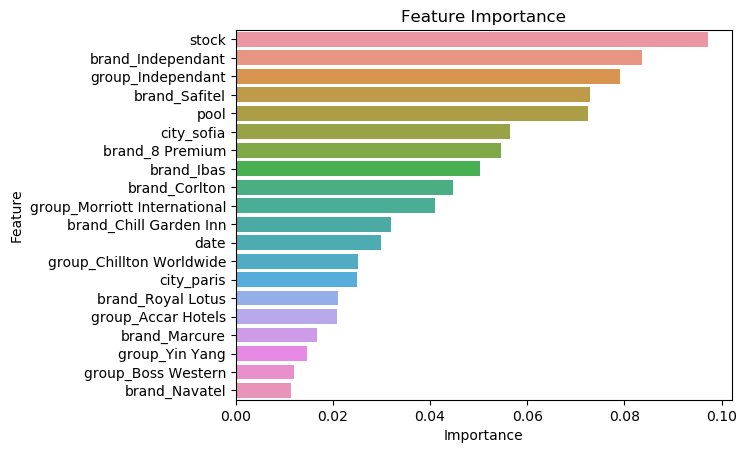

In [13]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(20), x='Importance', y='Feature')

In [124]:
importance = feature_importance_df.head(20)
importance['is_brand'] = importance.Feature.str.contains('brand')
brand_importance = importance[importance['is_brand'] == True]
sum_brand_importance = brand_importance['Importance'].sum()

importance = feature_importance_df.head(20)
importance['is_city'] = importance.Feature.str.contains('city')
city_importance = importance[importance['is_city'] == True]
sum_city_importance = city_importance['Importance'].sum()

importance = feature_importance_df.head(20)
importance['is_language'] = importance.Feature.str.contains('language')
language_importance = importance[importance['is_language'] == True]
sum_language_importance = language_importance['Importance'].sum()

importance = feature_importance_df.head(20)
importance['is_group'] = importance.Feature.str.contains('group')
group_importance = importance[importance['is_group'] == True]
sum_group_importance = group_importance['Importance'].sum()

importance = feature_importance_df.head(20)
df = pd.DataFrame(columns=['Feature','Importance'])
df.loc[len(importance.axes[0])] = ['brand', sum_brand_importance]
df.loc[len(importance.axes[0])+1] = ['city', sum_city_importance]
df.loc[len(importance.axes[0])+2] = ['language', sum_language_importance]
df.loc[len(importance.axes[0])+4] = ['group', sum_group_importance]

importance1 = importance[importance['Feature'] == 'pool']
importance2 = importance[importance['Feature'] == 'parking']
importance3 = importance[importance['Feature'] == 'children_policy']
importance4 = importance[importance['Feature'] == 'date']
importance5 = importance[importance['Feature'] == 'stock']
importance6 = importance[importance['Feature'] == 'mobile']
tab=pd.concat([importance1,importance2,importance3,importance4,importance5,importance6,df])
tab = tab.sort_values(by = 'Importance', ascending = False)

/tmp/ipykernel_2963/1683341444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importance['is_brand'] = importance.Feature.str.contains('brand')
/tmp/ipykernel_2963/1683341444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importance['is_city'] = importance.Feature.str.contains('city')
/tmp/ipykernel_2963/1683341444.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Feature,Importance
24,group,0.385556
20,brand,0.332706
3,stock,0.097240
21,city,0.081248
1,pool,0.072411
4,date,0.029931
22,language,0.000000


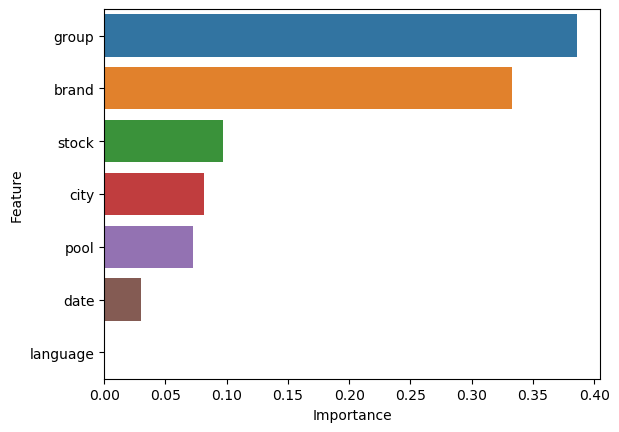

In [125]:
sns.barplot(data = tab, x='Importance', y='Feature')

### PDP and ICE plots

In [126]:
#from pdpbox import pdp, get_dataset, info_plots
#model = rf #lr, mlp
#model_name = 'random forest'

#features_importance_dict = {}
#features_importance_dict[model_name] = feature_importance_df #add the dataframe to your dictionnary

#top_5_features = features_importance_dict[model_name].Feature[:5].values

#for i, feature in enumerate(top_5_features, 1):
  #print(feature)
 #   pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_importance_dict[model_name].Feature.values, feature=feature)
 #   pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.5)
#plt.show()

In [ ]:
#features_to_plot = ['stock', 'date']
#inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=features_importance_dict[model_name].Feature, features=features_to_plot)

#pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
#plt.show()

In [127]:
#features_to_plot = ['parking', 'pool']
#inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=features_importance_dict[model_name].Feature, features=features_to_plot)

#pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
#plt.show()

### SHAP

In [128]:
import shap
shap.initjs()
idx = 1 
explainer = shap.KernelExplainer(rf.predict, X_train.iloc[0:500])
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value,shap_values, X_test.iloc[0,:])

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, *